# Discussion 1
## Titanic Data
### MSDS 422 - Fall 2020
### Jeff Matsumoto

In [51]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [63]:
#Import data as dataframe
df_t = pd.read_csv('train.csv')

#See first rows
df_t.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
df_t.info()

#shows missing values for age and cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df_t.describe()

#For passenger class, can see that there are 3 classes (1, 2, and 3) and more than 50% were in Class 3

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
#Get count of number of passengers in each class
df_Pclass = df_t['Pclass'].value_counts()
df_Pclass = df_Pclass.sort_index(ascending=True)
df_Pclass.columns = ['index','Passenger Count']
df_Pclass

1    216
2    184
3    491
Name: Pclass, dtype: int64

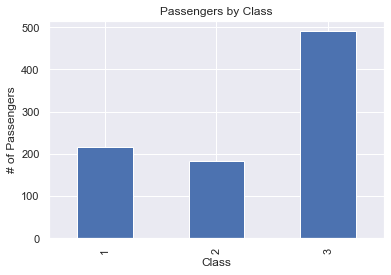

In [67]:
#Bar plot of number of passengers in each class
df_Pclass.plot.bar(y=df_Pclass)
plt.xlabel('Class')
plt.ylabel("# of Passengers")
plt.title('Passengers by Class')
plt.show()

In [68]:
#Get count of number of passengers of each gender
df_gen = df_t['Sex'].value_counts()
df_gen = df_gen.sort_index(ascending=True)
df_gen.columns = ['index','Passenger Count']
df_gen

female    314
male      577
Name: Sex, dtype: int64

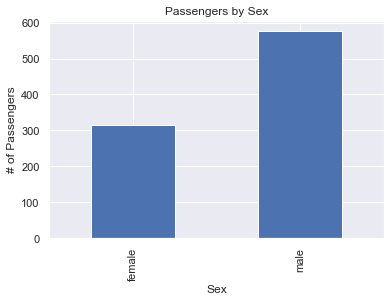

In [69]:
#Bar plot of number of passengers by gender
df_gen.plot.bar(y=df_gen)
plt.xlabel('Sex')
plt.ylabel("# of Passengers")
plt.title('Passengers by Sex')
plt.show()

In [91]:
#Get count of number of passengers in each class by gender
df_group = df_t.groupby(["Pclass","Sex"]).size()
print(df_group)

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


In [92]:
#Unstack the dataframe
df_group = df_group.unstack()
print(df_group)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


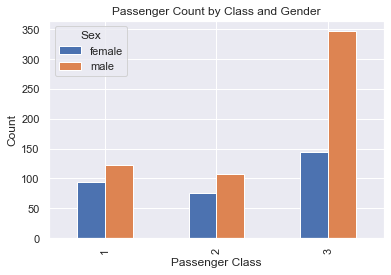

In [88]:
#Plot the Pclass and gender data as grouped bar plot
df_group.plot(kind="bar")
plt.title("Passenger Count by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()